# Feature Extraction and Selection Final Project
## Problem : Implement the SFS using wrapper method to find best subet of features.
### Student name: Sohrab Pirhadi
### Student Number: 984112

## Importing Libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt


### Reading Dataset

In [2]:
def readData(fname, pos_label):
    with open(fname,'r') as ifile:

        feat_vecs=[]
        labels=[]
        genes=[]
        
    
        for ln in ifile: #ifile is a 103*2135 dataset
            ln = ln.strip()
           
            ln=ln.split(' ') 
            if ln[0][0]=='y':
                for l in ln[1:]: 
                    if l==pos_label:
                        labels+=[1]
                    else:
                        labels+=[0]
            else:    
                vector=[]
                for f in ln[1:]:
                    vector+=[np.float(f)]
                feat_vecs+=[vector]
                genes+=[ln[0]]            
            
        return np.array(feat_vecs).T, np.array(labels), genes

In [3]:
fname='prostate_preprocessed.txt'
X,Y, genes=readData(fname, 'tumor')

In [4]:
X.shape

(102, 2135)

### Rows are samples(102)

In [5]:
X.shape[0]

102

In [6]:
X[0] #first row values(all features values for fisrt sample)

array([5.69059486, 5.88778316, 1.88879261, ..., 2.61453056, 1.26682453,
       3.31255957])

### Columns are features(2135)

In [7]:
len(genes)

2135

In [8]:
X.shape[1]

2135

In [9]:
X[:,0] # first column values(first feature value for all samples)

array([5.69059486, 2.75144902, 2.97493225, 2.92462381, 2.40580224,
       2.69924703, 2.72922363, 2.78626611, 2.91442554, 2.63298442,
       2.77227249, 7.41853756, 2.76734637, 2.84638365, 2.84363492,
       2.6838544 , 2.85611693, 2.88934443, 5.57914022, 4.92343421,
       2.93727671, 2.92318007, 5.06096788, 4.97599463, 2.96702689,
       3.12483623, 3.58778154, 3.54195116, 2.83918049, 6.8158786 ,
       8.40215971, 8.58654721, 6.31517933, 5.07114362, 6.4296921 ,
       5.96774009, 2.66304582, 2.8646453 , 3.06585605, 7.12692964,
       3.66904564, 3.02293729, 3.7806352 , 7.44054514, 8.30225607,
       6.87547898, 8.07740019, 7.53167675, 7.61985332, 7.50999083,
       7.63514068, 2.5954457 , 2.72118807, 4.65022047, 2.66356667,
       3.34890768, 7.77294303, 2.41158379, 2.6997339 , 4.71831496,
       2.93142878, 6.12353237, 2.8844526 , 2.73210744, 2.93292747,
       3.82659936, 2.86266639, 5.13120074, 3.03126056, 3.7142558 ,
       6.44649813, 2.7793152 , 5.99442885, 7.47969057, 4.53823

### Labels(102) 

In [10]:
Y # 0 for Normal and 1 for tumor

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### splitting data into training and testing

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101) #dividing with train test split
y_train.shape

(71,)

In [12]:
X_test[:,0:1]

array([[2.8646453 ],
       [2.75144902],
       [3.7142558 ],
       [6.33768405],
       [2.94382423],
       [6.12353237],
       [6.96567591],
       [4.65022047],
       [8.28538085],
       [6.31517933],
       [2.72922363],
       [2.7793152 ],
       [7.44054514],
       [2.85611693],
       [7.63514068],
       [8.58654721],
       [5.48881668],
       [2.84363492],
       [3.12483623],
       [2.5954457 ],
       [2.92318007],
       [2.92462381],
       [5.75437564],
       [2.41158379],
       [7.61985332],
       [7.53167675],
       [2.84422763],
       [2.6997339 ],
       [2.97493225],
       [2.84638365],
       [6.87547898]])

In [13]:
X_test[:,0].reshape(-1,1)

array([[2.8646453 ],
       [2.75144902],
       [3.7142558 ],
       [6.33768405],
       [2.94382423],
       [6.12353237],
       [6.96567591],
       [4.65022047],
       [8.28538085],
       [6.31517933],
       [2.72922363],
       [2.7793152 ],
       [7.44054514],
       [2.85611693],
       [7.63514068],
       [8.58654721],
       [5.48881668],
       [2.84363492],
       [3.12483623],
       [2.5954457 ],
       [2.92318007],
       [2.92462381],
       [5.75437564],
       [2.41158379],
       [7.61985332],
       [7.53167675],
       [2.84422763],
       [2.6997339 ],
       [2.97493225],
       [2.84638365],
       [6.87547898]])

## ML algorithm used --> KNN

In [14]:
knn = KNeighborsClassifier(n_neighbors=2) 

## Sequentioal Forward Selection 

In [15]:
kFeatures = 5
featureSubset = []
remainingFeatures = [x for x in  range(0,X.shape[1])]
maxScore = 0
maxIndex = -1
for i in range(len(remainingFeatures)):
        featureSubset = []
        if(i not in featureSubset):
            featureSubset.append(i)
        else:
            continue
        knn = KNeighborsClassifier()
        knn.fit(X_train[:,featureSubset].reshape(-1,1) , y_train)
        predict = knn.predict(X_test[:,i].reshape(-1,1))
        currentScore = f1_score(y_test, predict)
        if currentScore > maxScore:
            maxScore = currentScore
            maxIndex = i
        featureSubset.pop()
featureSubset.append([maxIndex,maxScore])
print(featureSubset)


    

[[1969, 0.8749999999999999]]


In [16]:
while len(featureSubset) < kFeatures:
    maxScore = 0
    maxIndex = -1
    tempSubset = [x[0] for x in featureSubset]
    for i in range(len(remainingFeatures)):
        if(i not in tempSubset):
            tempSubset.append(i)
        else:
            continue
        knn = KNeighborsClassifier()
        knn.fit(X_train[:,tempSubset] , y_train)
        predict = knn.predict(X_test[:,tempSubset])
        currentScore = f1_score(y_test, predict)
        if currentScore > maxScore:
            maxScore = currentScore
            maxIndex = i
        tempSubset.pop()
    featureSubset.append([maxIndex,maxScore])
    print(featureSubset)
    
        

[[1969, 0.8749999999999999], [173, 0.9375]]
[[1969, 0.8749999999999999], [173, 0.9375], [1800, 0.967741935483871]]
[[1969, 0.8749999999999999], [173, 0.9375], [1800, 0.967741935483871], [62, 0.967741935483871]]
[[1969, 0.8749999999999999], [173, 0.9375], [1800, 0.967741935483871], [62, 0.967741935483871], [30, 0.967741935483871]]


### Plotting The Reults

In [26]:
f_score = [item[1] for item in featureSubset]
f_score

[0.8749999999999999,
 0.9375,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871]

Text(0, 0.5, 'F1-Score')

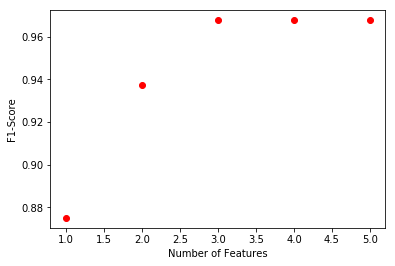

In [31]:
plt.plot([1,2,3,4,5],f_score, 'ro')
plt.xlabel('Number of Features')
plt.ylabel('F1-Score')


## Selected Genes

In [28]:
features_index = [item[0] for item in featureSubset]
features_index

[1969, 173, 1800, 62, 30]

In [29]:
for index in features_index:
    print(genes[index])

41706_at
1944_f_at
40755_at
1366_i_at
1218_at
